![alt](https://research.utm.my/wp-content/uploads/sites/26/2022/06/logo-300x122.png)
# Center for Artificial Intelligence and Robotics
#### Universiti Teknologi Malaysia


### ANN Classification

*Author: Dr. Ibrahim, Azzam, Thaqif & Syahmi*

**MNIST Dataset**

In [13]:
import torch #Core python library
import torchvision#datasets and image tranformation
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

**Download mnist Data**


In [14]:
# Define transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to be in the range [-1, 1]
])

# Download and load the training set
trainset = torchvision.datasets.MNIST(root='./dataset', train=True, download=True, transform=transform)

# Download and load the test set
testset = torchvision.datasets.MNIST(root='./dataset', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


**Display the mnist dataset**
# Question 1 - Display MNIST Dataset

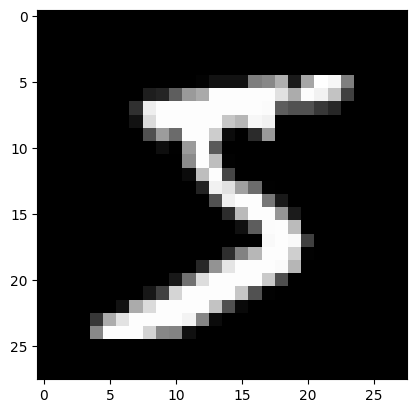

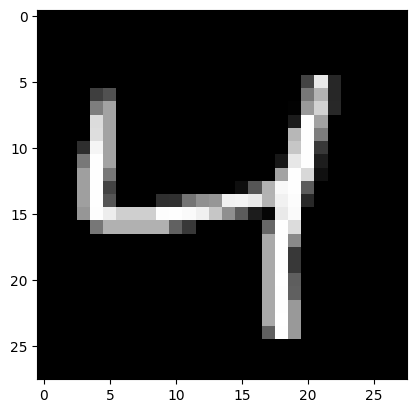

In [15]:
# Get one image from the dataset
for images, labels in trainloader:
    X_train = images[0].squeeze().numpy()  # Convert tensor to numpy array and squeeze it to remove the channel dimension
    break  # break to get only one image

# Plot the image
plt.imshow(X_train, cmap=plt.get_cmap('gray'))
plt.show()

# Show the second image
for images, labels in trainloader:
    X_train = images[2].squeeze().numpy()  # Convert tensor to numpy array and squeeze it to remove the channel dimension
    break  # break to get only one image

# Plot the image
plt.imshow(X_train, cmap=plt.get_cmap('gray'))
plt.show()

# show the plot
plt.show()

**Method 1**

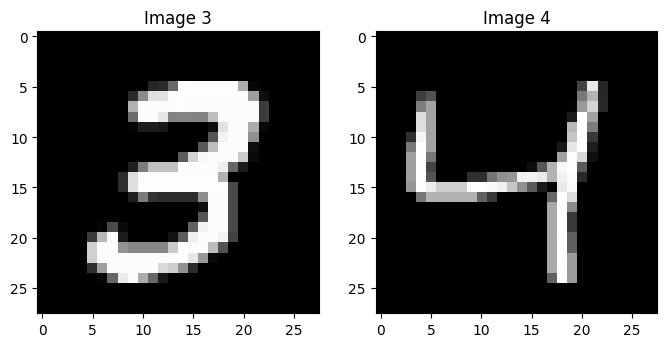

In [16]:
images_3_and_4 = {}  # Dictionary to store images with their labels

# Get 3rd and 4th images from the dataset
count = 0
for images, labels in trainloader:
    for i in range(len(labels)):
        label = labels[i].item()
        if label == 3 or label == 4:
            count += 1
            if label not in images_3_and_4:
                images_3_and_4[label] = images[i].squeeze().numpy()  # Convert tensor to numpy array and squeeze it to remove the channel dimension
        if len(images_3_and_4) == 2:
            break
    if len(images_3_and_4) == 2:
        break  # Stop once we have both images

# Plot the images
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(images_3_and_4[3], cmap=plt.get_cmap('gray'))
plt.title("Image 3")

plt.subplot(122)
plt.imshow(images_3_and_4[4], cmap=plt.get_cmap('gray'))
plt.title("Image 4")

plt.show()


**Method 2**

Text(0.5, 1.0, 'Image 4')

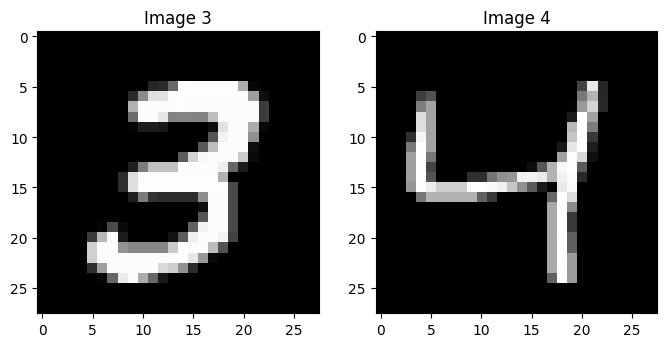

In [17]:
# Filter the dataset to include only labels 3 and 4
indices_3 = (trainset.targets == 3).nonzero(as_tuple=True)[0]
indices_4 = (trainset.targets == 4).nonzero(as_tuple=True)[0]
indices = torch.cat((indices_3[:1], indices_4[:1]))  # Concatenate the indices of 3rd and 4th images

# Load the images corresponding to the filtered indices
images_3_and_4 = torch.stack([trainset[i][0] for i in indices])

# Plot the images
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(images_3_and_4[0].squeeze(), cmap='gray')
plt.title("Image 3")

plt.subplot(122)
plt.imshow(images_3_and_4[1].squeeze(), cmap='gray')
plt.title("Image 4")

**Convert data from matrix to vector and Normalize**
# Question 2 - One Hot Encoding

In [18]:
num_classes=10
import torch.nn.functional as F
# Flatten the images and one-hot encode the labels
def preprocess_data(loader):
    images_list = []
    labels_list = []

    for images, labels in loader:
        # Flatten the images
        images = images.view(images.shape[0], -1).float()

        # Normalize images from range [-1, 1] to [0, 1]
        images = (images + 1) / 2

        # One-hot encode the labels
        labels = F.one_hot(labels,num_classes=num_classes).float()

        images_list.append(images)
        labels_list.append(labels)

    # Concatenate all batches
    images = torch.cat(images_list)
    labels = torch.cat(labels_list)

    return images, labels

# Preprocess the training and test data
X_train, y_train = preprocess_data(trainloader)
X_test, y_test = preprocess_data(testloader)

# Check the shapes of the processed data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: torch.Size([60000, 784])
y_train shape: torch.Size([60000, 10])
X_test shape: torch.Size([10000, 784])
y_test shape: torch.Size([10000, 10])


In [19]:
print(type(X_train), X_train.shape, y_train[0])

<class 'torch.Tensor'> torch.Size([60000, 784]) tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


**Create ANN**

**Train the Model**




In [20]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [21]:
# Define the model
class LargerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LargerModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.fc2 = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [23]:
# Hyperparameters
input_dim = 28 * 28  # Number of pixels in MNIST images
num_classes = 10  # Number of classes in MNIST

# Initialize the model
model = LargerModel(input_dim, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


**Training and Evaluation of the Model**

In [24]:
!pip install tqdm

Looking in indexes: http://jetson.webredirect.org/jp6/cu122


In [32]:
from tqdm import tqdm # for training progress bar

# Lists to store metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Training with progress bar
    train_progress = tqdm(trainloader, desc=f"Epoch {epoch + 1}/{num_epochs} Training", leave=False)

    for images, labels in train_progress:
        # Move tensors to the configured device
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_accuracy = 100 * (correct / float(total))

    # Save training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'\nEpoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        test_progress = tqdm(testloader, desc=f"Epoch {epoch + 1}/{num_epochs} Testing", leave=False)
        for images, labels in test_progress:
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= total
    test_accuracy = 100 * (correct / float(total))

    # Save test loss and accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

print('Training complete')



Epoch [1/15], Train Loss: 1.4887, Train Accuracy: 97.29%


Epoch [1/15], Test Loss: 1.4913, Test Accuracy: 96.99%



Epoch [2/15], Train Loss: 1.4887, Train Accuracy: 97.26%


Epoch [2/15], Test Loss: 1.4937, Test Accuracy: 96.71%



Epoch [3/15], Train Loss: 1.4867, Train Accuracy: 97.47%


Epoch [3/15], Test Loss: 1.4933, Test Accuracy: 96.84%



Epoch [4/15], Train Loss: 1.4855, Train Accuracy: 97.62%


Epoch [4/15], Test Loss: 1.4954, Test Accuracy: 96.55%



Epoch [5/15], Train Loss: 1.4844, Train Accuracy: 97.71%


Epoch [5/15], Test Loss: 1.4872, Test Accuracy: 97.39%



Epoch [6/15], Train Loss: 1.4844, Train Accuracy: 97.67%


Epoch [6/15], Test Loss: 1.4929, Test Accuracy: 96.85%



Epoch [7/15], Train Loss: 1.4829, Train Accuracy: 97.87%


Epoch [7/15], Test Loss: 1.4897, Test Accuracy: 97.14%



Epoch [8/15], Train Loss: 1.4826, Train Accuracy: 97.87%


Epoch [8/15], Test Loss: 1.4925, Test Accuracy: 96.88%



Epoch [9/15], Train Loss: 1.4826, Train Accuracy: 97.86%


Epoch [9/15], Test Loss: 1.4871, Test Accuracy: 97.39%



Epoch [10/15], Train Loss: 1.4818, Train Accuracy: 97.94%


Epoch [10/15], Test Loss: 1.4948, Test Accuracy: 96.55%



Epoch [11/15], Train Loss: 1.4808, Train Accuracy: 98.06%


Epoch [11/15], Test Loss: 1.4897, Test Accuracy: 97.11%



Epoch [12/15], Train Loss: 1.4807, Train Accuracy: 98.06%


Epoch [12/15], Test Loss: 1.4881, Test Accuracy: 97.36%



Epoch [13/15], Train Loss: 1.4796, Train Accuracy: 98.17%


Epoch [13/15], Test Loss: 1.4882, Test Accuracy: 97.32%



Epoch [14/15], Train Loss: 1.4799, Train Accuracy: 98.13%


Epoch [14/15], Test Loss: 1.4894, Test Accuracy: 97.16%



Epoch [15/15], Train Loss: 1.4791, Train Accuracy: 98.21%


Epoch [15/15], Test Loss: 1.4861, Test Accuracy: 97.51%
Training complete


# Answer Question 3 - Plot the Loss Graph

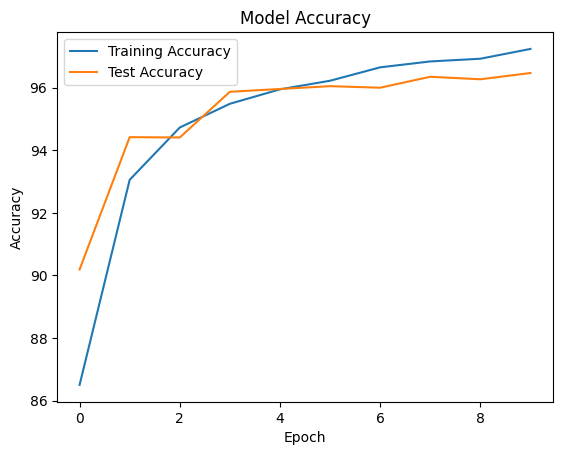

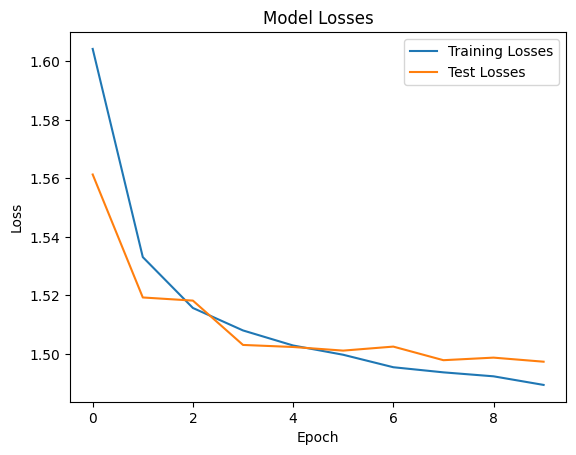

In [27]:
#You need to plot training and validation Lossess
#Pytorch does not save training history. Save these lists to a file or process them further as needed.
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Graph
plt.plot(train_losses, label='Training Losses')
plt.plot(test_losses, label='Test Losses')
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




**`Evaluate the Model and Display the Test Data`**

In [28]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
test_accuracy = 100 * correct / total
print("Accuracy: %.2f%%" % test_accuracy)
print("Baseline Error: %.2f%%" % (100 - test_accuracy))


Accuracy: 96.47%
Baseline Error: 3.53%


**Get the prediction**



# Answer Question 4 - Predict The Test Data

**Save and Load the Trained Model**
# Question 5 - Save The Model

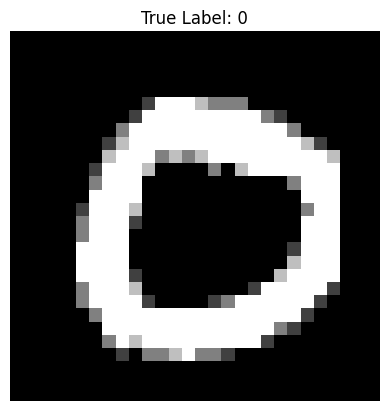

Predicted Class: 0


In [29]:
# Predict Data
# Move the model to the desired device (GPU)
load_model = model.to(device)
load_model.eval()  # Set the model to evaluation mode

# Get the 5000th image and its label from the test set
image, label = testset[4999]

# Display the image
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f"True Label: {label}")
plt.axis('off')
plt.show()

# Preprocess the image (flatten it to match the expected input size)
input_image = image.view(-1, 28*28)  # Flatten the image
input_image = input_image.to(device)  # Move to the desired device (GPU or CPU)

# Predict
with torch.no_grad():
    output = load_model(input_image)  # Forward pass
    probabilities = F.softmax(output, dim=1)  # Compute probabilities
    predicted_class=torch.argmax(probabilities,dim=1).item()

# Display the predicted class
print(f"Predicted Class: {predicted_class}")


In [30]:
#You need to save and load your model in the Colab Notebooks Folder in the Model Sub-folder

import os

# Define the path to save the model
save_path = 'model/mnist_model.pt'

# Create the parent directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Check if the parent directory exists
parent_dir_exists = os.path.exists(os.path.dirname(save_path))
print(f"Parent directory exists: {parent_dir_exists}")

# Save model
torch.save(model.state_dict(), save_path)
print(f"Model saved to: {save_path}")



Parent directory exists: True
Model saved to: model/mnist_model.pt


In [31]:
!ls 'model'

mnist_model.pt	pima_model_KV.pt  pima_model_mardi.pt  pima_model.pt
